In [ ]:
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pylab as pl
from IPython import display
import pandas as pd
import sys
import io
import itertools
import pickle
import shutil
import sklearn.metrics
import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.python.ops import array_ops
%matplotlib inline

In [ ]:
import socket
import struct

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
def getLabeled(i):
    if(i.find("Botnet")>0):
      return 1
    if(i.find("Background")>0):
      return 2
    return 0


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!wget --no-check-certificate https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-51/detailed-bidirectional-flow-labels/capture20110818.binetflow

--2022-04-29 09:02:57--  https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-51/detailed-bidirectional-flow-labels/capture20110818.binetflow
Resolving mcfp.felk.cvut.cz (mcfp.felk.cvut.cz)... 147.32.82.194
Connecting to mcfp.felk.cvut.cz (mcfp.felk.cvut.cz)|147.32.82.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 179074339 (171M)
Saving to: ‘capture20110818.binetflow.2’

capture20110818.bin 100%[===================>] 170.78M  13.2MB/s    in 14s     

2022-04-29 09:03:13 (11.9 MB/s) - ‘capture20110818.binetflow.2’ saved [179074339/179074339]



In [ ]:
data=pd.read_csv("/content/drive/MyDrive/capture20110818.binetflow")
data

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/18 09:56:29.146156,2752.656250,udp,71.222.124.71,60621,<->,147.32.84.59,63550,CON,0.0,0.0,3,435,290,flow=Background-Established-cmpgw-CVUT
1,2011/08/18 09:56:42.630892,1849.315552,udp,78.234.54.245,51413,<->,147.32.84.59,63550,CON,0.0,0.0,3,417,272,flow=Background-Established-cmpgw-CVUT
2,2011/08/18 09:56:44.640650,2091.747314,udp,31.147.120.139,63195,<->,147.32.84.59,63550,CON,0.0,0.0,2,290,145,flow=Background-Established-cmpgw-CVUT
3,2011/08/18 10:10:52.782230,1535.769409,udp,118.5.35.64,39110,<->,147.32.84.59,63550,CON,0.0,0.0,2,290,145,flow=Background-Established-cmpgw-CVUT
4,2011/08/18 10:19:13.328372,0.002636,tcp,147.32.86.166,33426,<?>,212.24.150.110,25443,FRPA_FPA,0.0,0.0,6,490,321,flow=Background
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309786,2011/08/18 15:04:59.738400,0.000000,icmp,147.32.84.192,0x7360,->,147.32.96.69,NaN,UNK,0.0,NaN,1,1066,1066,flow=From-Botnet-V51-3-ICMP
1309787,2011/08/18 15:04:59.740006,0.000000,icmp,147.32.84.208,0xd36f,->,147.32.96.69,NaN,UNK,0.0,NaN,1,1066,1066,flow=From-Botnet-V51-9-ICMP
1309788,2011/08/18 15:04:59.740113,0.000000,icmp,147.32.84.208,0x3da3,->,147.32.96.69,NaN,UNK,0.0,NaN,1,1066,1066,flow=From-Botnet-V51-9-ICMP
1309789,2011/08/18 15:04:59.741823,0.000000,icmp,147.32.84.208,0x441d,->,147.32.96.69,NaN,ROB,0.0,NaN,1,1066,1066,flow=From-Botnet-V51-9-ICMP


In [ ]:
data['Label']=data['Label'].apply(getLabeled)

In [ ]:
data.describe()

,Dur,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
count,1.309791e+06,1.296939e+06,1.123000e+06,1.309791e+06,1.309791e+06,1.309791e+06,1.309791e+06
mean,2.538714e+02,4.277688e-02,4.532502e-04,4.851227e+01,3.695596e+04,8.064216e+03,1.894605e+00
std,7.694298e+02,2.826380e+00,3.413830e-02,4.419512e+03,3.821740e+06,1.253815e+06,3.442166e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00
25%,2.610000e-04,0.000000e+00,0.000000e+00,2.000000e+00,2.140000e+02,7.900000e+01,2.000000e+00
50%,8.780000e-04,0.000000e+00,0.000000e+00,2.000000e+00,3.220000e+02,9.000000e+01,2.000000e+00
75%,2.277852e+00,0.000000e+00,0.000000e+00,6.000000e+00,1.066000e+03,9.290000e+02,2.000000e+00
max,3.600019e+03,1.920000e+02,3.000000e+00,1.853001e+06,1.933022e+09,1.233900e+09,2.000000e+00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309791 entries, 0 to 1309790
Data columns (total 15 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   StartTime  1309791 non-null  object 
 1   Dur        1309791 non-null  float64
 2   Proto      1309791 non-null  object 
 3   SrcAddr    1309791 non-null  object 
 4   Sport      1302804 non-null  object 
 5   Dir        1309791 non-null  object 
 6   DstAddr    1309791 non-null  object 
 7   Dport      1205576 non-null  object 
 8   State      1308563 non-null  object 
 9   sTos       1296939 non-null  float64
 10  dTos       1123000 non-null  float64
 11  TotPkts    1309791 non-null  int64  
 12  TotBytes   1309791 non-null  int64  
 13  SrcBytes   1309791 non-null  int64  
 14  Label      1309791 non-null  int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 149.9+ MB


In [ ]:
data.isnull().sum()

StartTime         0
Dur               0
Proto             0
SrcAddr           0
Sport          6987
Dir               0
DstAddr           0
Dport        104215
State          1228
sTos          12852
dTos         186791
TotPkts           0
TotBytes          0
SrcBytes          0
Label             0
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
data['Label'].unique()

array([2, 0, 1])

In [ ]:
def convert(Sip):
  Sip = socket.inet_aton(Sip)
  Sip = struct.unpack("!L", Sip)[0]
  return Sip


In [ ]:
data['SrcAddr']=data['SrcAddr'].apply(convert)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data['DstAddr']=data['DstAddr'].apply(convert)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data['Proto'].unique()

array(['udp', 'tcp', 'rtp', 'rtcp', 'icmp', 'udt'], dtype=object)

In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data['Proto'])
data['Proto']=le.transform(data['Proto'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data['State'])
data['State']=le.transform(data['State'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/18 09:56:29.146156,2752.656250,4,1205763143,60621,<->,2468369467,63550,13,0.0,0.0,3,435,290,2
1,2011/08/18 09:56:42.630892,1849.315552,4,1323972341,51413,<->,2468369467,63550,13,0.0,0.0,3,417,272,2
2,2011/08/18 09:56:44.640650,2091.747314,4,529758347,63195,<->,2468369467,63550,13,0.0,0.0,2,290,145,2
3,2011/08/18 10:10:52.782230,1535.769409,4,1980048192,39110,<->,2468369467,63550,13,0.0,0.0,2,290,145,2
4,2011/08/18 10:19:13.328372,0.002636,3,2468370086,33426,<?>,3558381166,25443,56,0.0,0.0,6,490,321,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309688,2011/08/18 15:04:59.566808,0.038428,3,3261910038,42969,->,2468369546,8080,203,0.0,0.0,6,1638,1008,2
1309697,2011/08/18 15:04:59.579762,0.000158,3,3682719122,25463,->,2468370220,80,251,0.0,0.0,2,152,78,2
1309715,2011/08/18 15:04:59.626719,0.000688,4,3587991704,64126,<->,2468369637,13363,13,0.0,0.0,2,306,244,2
1309756,2011/08/18 15:04:59.686325,0.000689,4,991300600,44432,<->,2468369637,13363,13,0.0,0.0,2,144,83,2


In [ ]:
data.iloc[:,:-1].corr()

,Dur,Proto,SrcAddr,DstAddr,State,sTos,dTos,TotPkts,TotBytes,SrcBytes
Dur,1.000000,0.094738,-0.123640,-0.039711,-0.086461,0.014339,0.011964,0.015580,0.011829,0.006158
Proto,0.094738,1.000000,-0.035232,0.209984,-0.792962,0.009990,0.003958,-0.014652,-0.013660,-0.004268
SrcAddr,-0.123640,-0.035232,1.000000,-0.072460,0.013958,-0.015768,0.002698,-0.001007,-0.000016,-0.000161
DstAddr,-0.039711,0.209984,-0.072460,1.000000,-0.220912,0.005506,-0.007000,-0.000790,-0.001121,-0.002443
State,-0.086461,-0.792962,0.013958,-0.220912,1.000000,-0.007722,-0.001248,0.012177,0.011137,0.004583
sTos,0.014339,0.009990,-0.015768,0.005506,-0.007722,1.000000,0.047278,-0.000200,-0.000189,-0.000094
dTos,0.011964,0.003958,0.002698,-0.007000,-0.001248,0.047278,1.000000,0.000200,0.000219,0.001011
TotPkts,0.015580,-0.014652,-0.001007,-0.000790,0.012177,-0.000200,0.000200,1.000000,0.946802,0.315553
TotBytes,0.011829,-0.013660,-0.000016,-0.001121,0.011137,-0.000189,0.000219,0.946802,1.000000,0.393048
SrcBytes,0.006158,-0.004268,-0.000161,-0.002443,0.004583,-0.000094,0.001011,0.315553,0.393048,1.000000


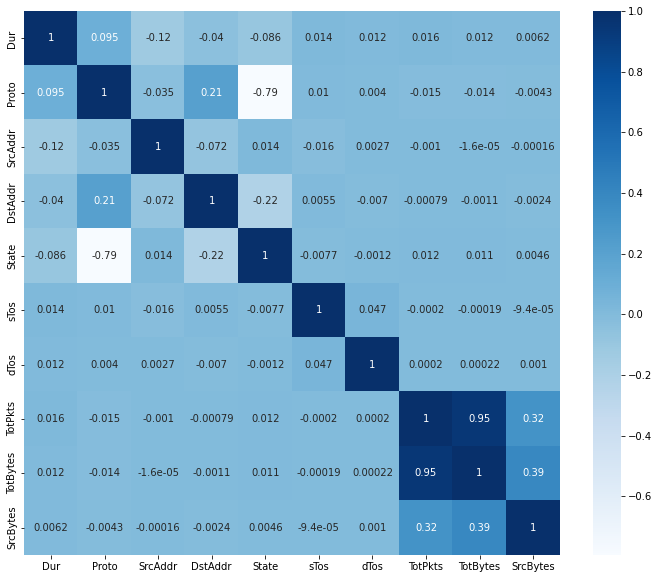

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data.iloc[:,:-1].corr(),annot=True,cmap='Blues')

In [ ]:
data.drop(['StartTime','TotPkts','Dir'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [ ]:
X['Dur']=X['Dur'].astype('int')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110530 entries, 0 to 1309764
Data columns (total 11 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Dur       1110530 non-null  int64  
 1   Proto     1110530 non-null  int64  
 2   SrcAddr   1110530 non-null  int64  
 3   Sport     1110530 non-null  object 
 4   DstAddr   1110530 non-null  int64  
 5   Dport     1110530 non-null  object 
 6   State     1110530 non-null  int64  
 7   sTos      1110530 non-null  float64
 8   dTos      1110530 non-null  float64
 9   TotBytes  1110530 non-null  int64  
 10  SrcBytes  1110530 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 101.7+ MB


In [ ]:
def Hex_to_int(i):
  return int(i,base=16)

In [ ]:
X['Sport']=X['Sport'].apply(Hex_to_int)
X['Dport']=X['Dport'].apply(Hex_to_int)

In [ ]:
cols=X.columns

In [ ]:
X=normalize(X,norm="l2")

In [ ]:
X

array([[1.00177345e-06, 1.45606605e-09, 4.38917695e-01, ...,
        0.00000000e+00, 1.58347183e-07, 1.05564789e-07],
       [6.60115081e-07, 1.42804777e-09, 4.72673937e-01, ...,
        0.00000000e+00, 1.48873980e-07, 9.71072482e-08],
       [8.28257368e-07, 1.58442347e-09, 2.09840389e-01, ...,
        0.00000000e+00, 1.14870702e-07, 5.74353508e-08],
       ...,
       [0.00000000e+00, 9.18472193e-10, 8.23867652e-01, ...,
        0.00000000e+00, 7.02631227e-08, 5.60268038e-08],
       [0.00000000e+00, 1.50376730e-09, 3.72671357e-01, ...,
        0.00000000e+00, 5.41356229e-08, 3.12031715e-08],
       [0.00000000e+00, 1.03719680e-09, 8.53395209e-01, ...,
        0.00000000e+00, 6.63805955e-08, 4.35622658e-08]])

In [ ]:
Y=np.array(Y)
Y

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
from numpy import array
from numpy import argmax
from tensorflow.keras.utils import to_categorical
# define example



# one hot encode
encoded = to_categorical(Y)
print(encoded)
# invert encoding
inverted = argmax(encoded[0])
print(inverted)
len(encoded)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
2


1110530

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,encoded,test_size=0.3,random_state=1)

In [ ]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((777371, 11), (777371, 3), (333159, 11), (333159, 3))

In [ ]:
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout





In [ ]:
modell = Sequential()
modell.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modell.add(Dropout(0.2))
modell.add(LSTM(100, return_sequences=False))
modell.add(Dropout(0.2))
modell.add(Dense(3,activation='softmax'))

In [ ]:
modell.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=['accuracy','MeanSquaredError','AUC'])

history=modell.fit(X_train,Y_train,epochs= 15,batch_size=64)

Epoch 1/15
12147/12147 [==============================] - 298s 24ms/step - loss: 0.0723 - accuracy: 0.9864 - mean_squared_error: 0.0089 - auc: 0.9951
Epoch 2/15
12147/12147 [==============================] - 299s 25ms/step - loss: 0.0726 - accuracy: 0.9864 - mean_squared_error: 0.0089 - auc: 0.9950
Epoch 3/15
12147/12147 [==============================] - 290s 24ms/step - loss: 0.0731 - accuracy: 0.9864 - mean_squared_error: 0.0089 - auc: 0.9949
Epoch 4/15
12147/12147 [==============================] - 290s 24ms/step - loss: 0.0727 - accuracy: 0.9864 - mean_squared_error: 0.0089 - auc: 0.9950
Epoch 5/15
12147/12147 [==============================] - 287s 24ms/step - loss: 0.0728 - accuracy: 0.9864 - mean_squared_error: 0.0089 - auc: 0.9950
Epoch 6/15
12147/12147 [==============================] - 288s 24ms/step - loss: 0.0723 - accuracy: 0.9864 - mean_squared_error: 0.0089 - auc: 0.9952
Epoch 7/15
12147/12147 [==============================] - 287s 24ms/step - loss: 0.0729 - accuracy: 

In [ ]:
modell.save("./model.h5")

In [ ]:
modell.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 11, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 11, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               60400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 71,103
Trainable params: 71,103
Non-trainable params: 0
_________________________________________________________________


In [ ]:
clf=tf.keras.models.load_model('./model.h5')

In [ ]:
predicted_data=clf.predict(X_test)
predicted_data

array([[2.4847055e-03, 2.6725823e-11, 9.9751532e-01],
       [1.7100854e-02, 1.0798493e-08, 9.8289919e-01],
       [2.3361002e-03, 1.6718947e-11, 9.9766386e-01],
       ...,
       [2.9379141e-03, 4.9944207e-14, 9.9706203e-01],
       [2.5316845e-03, 1.9785298e-11, 9.9746835e-01],
       [1.7101003e-02, 1.0797728e-08, 9.8289895e-01]], dtype=float32)

In [ ]:
ans=[]
Y=[]
for i in range(len(predicted_data)):
  ans.append(np.argmax(predicted_data[i]))
  Y.append(np.argmax(Y_test[i]))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(ans,Y))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.99      0.99    333159

    accuracy                           0.99    333159
   macro avg       0.33      0.33      0.33    333159
weighted avg       1.00      0.99      0.99    333159



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(ans,Y)

array([[     0,      0,      0],
       [     0,      0,      0],
       [  4476,     67, 328616]])

In [ ]:
accuracy_score(ans,Y)

0.9863638683031225

In [ ]:
history.history

{'accuracy': [0.9864466190338135,
  0.9864453673362732,
  0.9864491820335388,
  0.9864479303359985,
  0.9864491820335388,
  0.9864491820335388,
  0.9864491820335388,
  0.9864479303359985,
  0.9864491820335388,
  0.9864286184310913,
  0.9864453673362732,
  0.9864453673362732,
  0.9864427447319031,
  0.9864414930343628,
  0.9864453673362732],
 'auc': [0.9950833320617676,
  0.9949905872344971,
  0.9948702454566956,
  0.9949565529823303,
  0.994960367679596,
  0.9951690435409546,
  0.9950666427612305,
  0.9950979351997375,
  0.9950776696205139,
  0.9950410723686218,
  0.9950865507125854,
  0.9951230883598328,
  0.9950880408287048,
  0.995032548904419,
  0.9951018691062927],
 'loss': [0.07226892560720444,
  0.07260044664144516,
  0.0730941966176033,
  0.07267216593027115,
  0.07283370941877365,
  0.07225346565246582,
  0.07285986840724945,
  0.07257630676031113,
  0.07283732295036316,
  0.07313979417085648,
  0.07351240515708923,
  0.07313764840364456,
  0.07323700934648514,
  0.07354727387

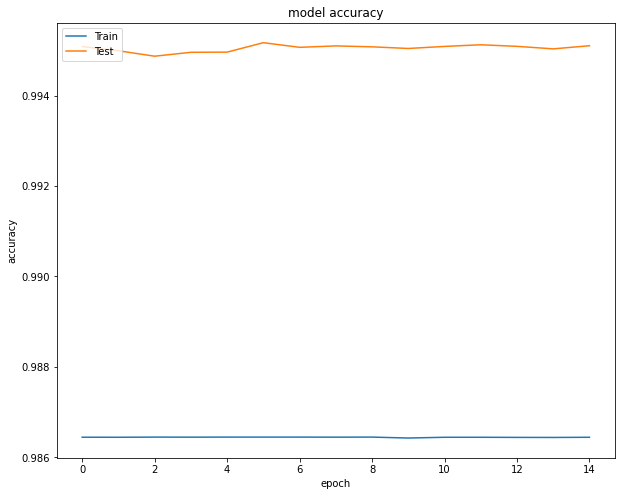

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['auc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = modell.predict(X_test)


In [ ]:
y_pred_keras

array([[3.0854568e-04, 7.7382940e-11, 9.9969149e-01],
       [1.4354512e-02, 8.1057202e-08, 9.8564535e-01],
       [5.9967447e-04, 2.6220104e-10, 9.9940038e-01],
       ...,
       [7.9020706e-04, 1.1732104e-10, 9.9920976e-01],
       [8.0553157e-04, 4.5849932e-10, 9.9919444e-01],
       [1.4353487e-02, 8.1050800e-08, 9.8564643e-01]], dtype=float32)

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_pred_keras[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_pred_keras.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

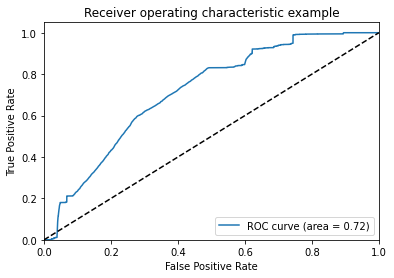

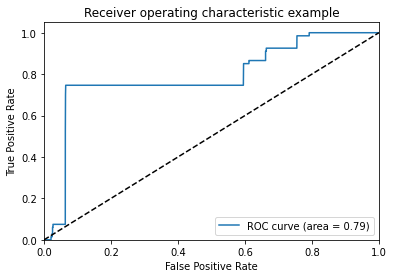

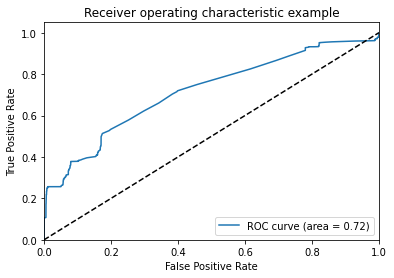

In [ ]:
for i in range(3):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()